# Project 4, APS1070 Fall 2022
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Tongfei Li
*   Your **student number**: 1004759460



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

### part1.1 Print the dataframe.

In [3]:
### YOUR CODE HERE ###
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


### part1.2 Prepare your dataset as follows:
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.


In [4]:
y = pd.DataFrame(df.Goal)
X = df.drop(columns=['Goal'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15/0.85, random_state=1)
X_train

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
8086,66,-28,0.35,0.17,0.82,0.5,-15,-5,0.002,-0.2,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.032
9723,-280,7,0.08,0.22,1.09,-0.8,-14,-14,-0.004,-0.1,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.029
2609,151,-33,0.09,-0.07,0.32,1.3,-6,9,-0.011,-0.3,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.016
8125,-7,-14,0.20,0.24,0.76,1.2,-11,-24,-0.026,0.2,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.027
10773,-80,-17,0.20,-0.04,0.70,-0.8,-10,11,-0.008,-1.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,25,-14,-0.23,0.09,1.10,0.3,-16,2,0.021,0.4,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.040
11442,-191,-5,-0.10,0.07,0.96,0.5,-14,-12,-0.015,0.5,...,-0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.026
7049,361,-33,0.45,0.19,0.25,0.2,-11,-16,-0.012,-1.2,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.020
4556,139,-31,0.48,0.02,0.73,0.4,-14,7,0.010,-0.2,...,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.031


*   Standardize the data using `StandardScaler` from sklearn. 

In [6]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_val = scaler.transform(X_val)
Xs_test = scaler.transform(X_test)
Xs_train

array([[ 0.3004541 , -0.58575452,  1.12953143, ...,  0.01177122,
         1.39835202,  1.42773998],
       [-1.02505276,  0.75892079,  0.24495087, ...,  0.01177122,
         0.89251703,  0.99924434],
       [ 0.62608439, -0.77785099,  0.27771311, ...,  0.01177122,
        -0.62498793, -0.85757008],
       ...,
       [ 1.43058277, -0.77785099,  1.45715386, ...,  0.01177122,
        -0.11915294, -0.28624256],
       [ 0.58011306, -0.7010124 ,  1.55544059, ...,  0.01177122,
         1.39835202,  1.2849081 ],
       [-1.06336221, -2.00726841,  0.27771311, ...,  0.01177122,
        -0.11915294, -0.28624256]])

 *   Insert the first column of all $1$s in the training, validation, and test set.

In [7]:
one_train = np.ones(np.shape(Xs_train)[0]).reshape(-1, 1)
one_valid = np.ones(np.shape(Xs_val)[0]).reshape(-1, 1)
one_test = np.ones(np.shape(Xs_test)[0]).reshape(-1, 1)
Xs_train_1f = np.hstack((one_train, Xs_train))
Xs_val_1f = np.hstack((one_valid, Xs_val))
Xs_test_1f = np.hstack((one_valid, Xs_test))

Xs_train_1f

array([[ 1.        ,  0.3004541 , -0.58575452, ...,  0.01177122,
         1.39835202,  1.42773998],
       [ 1.        , -1.02505276,  0.75892079, ...,  0.01177122,
         0.89251703,  0.99924434],
       [ 1.        ,  0.62608439, -0.77785099, ...,  0.01177122,
        -0.62498793, -0.85757008],
       ...,
       [ 1.        ,  1.43058277, -0.77785099, ...,  0.01177122,
        -0.11915294, -0.28624256],
       [ 1.        ,  0.58011306, -0.7010124 , ...,  0.01177122,
         1.39835202,  1.2849081 ],
       [ 1.        , -1.06336221, -2.00726841, ...,  0.01177122,
        -0.11915294, -0.28624256]])

### part1.3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)?

For SGD we have one epoch per iteration, to calculate $w_{i+1}$. 

For mini-batch, we seperate rows of data by n number of batches, with each epoch, we repeat by n times to calculate new $w$.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

### Implement the direct solution of the linear regression problem on the training set.

In [8]:
# function defined to calculate rmse
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [9]:
y = y_train.values.reshape(-1, 1)
y

array([[-0.0017],
       [-0.0011],
       [-0.0005],
       ...,
       [-0.001 ],
       [-0.0013],
       [-0.0013]])

In [10]:
# analytical solution
W = np.dot(linalg.inv(np.dot(Xs_train_1f.T, Xs_train_1f)), np.dot(Xs_train_1f.T, y))

# prediction
y_train_pred = np.dot(Xs_train_1f, W)
y_val_pred = np.dot(Xs_val_1f, W)


In [11]:
W.shape[0]

41

In [222]:
(np.random.random(W.shape[0])/1000).reshape(1,-1)

array([[3.21463707e-05, 4.30406358e-04, 7.13787309e-04, 4.13096855e-04,
        5.59791000e-04, 2.62378698e-04, 4.57572946e-04, 4.69662940e-04,
        5.60106478e-04, 3.06256589e-04, 3.85587476e-04, 2.43801427e-04,
        5.77919026e-04, 2.95373340e-04, 4.46715982e-04, 7.66491827e-04,
        9.23718143e-04, 9.86018714e-04, 7.05831474e-04, 9.43845447e-04,
        6.23225498e-04, 7.68978908e-04, 8.78067673e-04, 9.35843288e-04,
        8.81738941e-05, 2.61014633e-05, 3.15557508e-04, 1.62166428e-04,
        9.50886448e-06, 2.78834483e-04, 7.13659871e-04, 2.83387297e-04,
        9.63643299e-04, 8.23272078e-04, 4.93144260e-04, 3.58647436e-04,
        8.77280268e-04, 7.14555505e-06, 5.15241431e-05, 9.21857395e-04,
        9.34625639e-04]])

### Report the root-mean-square error (RMSE) for both the training and validation sets.

In [12]:
print('RMSE training set: ', rmse(y_train_pred, y))
print('RMSE validation set: ', rmse(y_val_pred, y_val.values.reshape(-1, 1)))

RMSE training set:  0.00018781953559552243
RMSE validation set:  0.00018203231331176327


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [15]:
import time
start_time = time.time() ## Records current time

t_train = y_train.values.reshape(-1, 1)
t_val = y_val.values.reshape(-1, 1)
### Inital weights
w = (np.random.random(W.shape[0])/1000).reshape(1,-1)
### Learning rate
lr = 0.01  
### convergence threshold
ct = 1.001 * rmse(y_val_pred, y_val.values.reshape(-1, 1)) 
### initiate rmse
rm = ct + 1
rmse_train=[]
rmse_val=[]
### record epoch
epoch = 0
epoch_array=[]
while (rm > ct): ### stopping condition
    y= np.dot(Xs_train_1f,w.T).reshape (-1,1)
    rmse_train.append(rmse(y,t_train))
    yval = np.dot(Xs_val_1f,w.T).reshape (-1,1)
    rmse_val.append(rmse(yval,t_val))
    # gradient
    gradient = (1/len(y) * np.dot(Xs_train_1f.T, y-t_train)).reshape(1,-1)
    w = w - lr * gradient ### weight update
    #epoch
    epoch_array.append(epoch)
    epoch+=1
    rm = rmse(yval,t_val)


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))


--- Total Training Time: 2.87992000579834 (s) ---


* Plot the training RMSE and the validation RMSE vs. epoch on the same figure. 

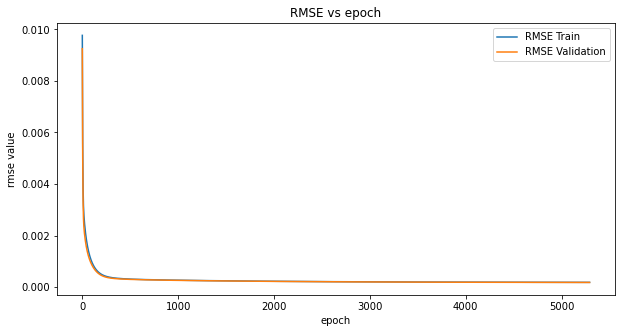

In [225]:
plt.figure(figsize=(10,5))
plt.title('RMSE vs epoch')
plt.plot(epoch_array, rmse_train, label='RMSE Train')
plt.plot(epoch_array, rmse_val, label='RMSE Validation')
plt.xlabel('epoch')
plt.ylabel('rmse value')
plt.legend()
plt.show()

In [226]:
print('RMSE for trainning at convergence:',rmse_train[-1])
print('RMSE for validation at convergence:',rmse_val[-1])

RMSE for trainning at convergence: 0.00018571550235489456
RMSE for validation at convergence: 0.00018221144682682643


* Comment on overfitting/underfitting by observing the training and validation RMSE

Here I do not see any sign of underfitting or overfitting. Since RMSE for validation and training set is very closed to each other, and RMSE of training is not smaller than that for validation.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [29]:
def mini_batch(X_train, y_train, X_val, y_val, b_size, lr, ct):
    start_time = time.time() ## Records current time
    elapse_time = []
    t_train = y_train.values.reshape(-1, 1)
    t_val = y_val.values.reshape(-1, 1)
    ### Inital weights
    w = (np.random.random(W.shape[0])/1000).reshape(1,-1)
#     ### Learning rate
#     lr = 0.01  
#     ### convergence threshold
#     ct = 1.001 * rmse(y_val_pred, y_val.values.reshape(-1, 1)) 
    ### initiate rmse
    rm = ct + 1
    rmse_train=[]
    rmse_val=[]
    ### record epoch
    epoch = 0
    epoch_array=[]
    while (rm > ct): ### stopping condition
        for b in range(0,X_train.shape[0],b_size): # iteration each batch
            if (b+b_size)>X_train.shape[0]:
                size = X_train.shape[0]-b
            else:
                size = b_size
            Xb_train = X_train[b:b+size,:]
            yb_train = np.dot(Xb_train,w.T).reshape(-1, 1) #predict
            tb_train = t_train[b:b+size,:].reshape(-1, 1) #actual
            # gradient
            gradient = (1/len(yb_train) * np.dot(Xb_train.T, yb_train-tb_train)).reshape(1,-1)
            w = w - lr * gradient ### weight update
        
        # update RMSE
        yp_train = np.dot(X_train,w.T).reshape (-1,1)
        yp_val = np.dot(X_val,w.T).reshape (-1,1)
        rmse_train.append(rmse(yp_train,t_train))
        rmse_val.append(rmse(yp_val,t_val))
        #epoch
        epoch_array.append(epoch)
        epoch+=1
        rm = rmse(yp_val,t_val)
        # shuffle the entire dataset after each epoch
        shuffle = np.random.permutation(X_train.shape[0])
        X_train = X_train[shuffle]
        t_train = t_train[shuffle]
        # record time after each epoch
        elapse_time.append(time.time() - start_time)
        if len(rmse_train) >= 5:
            # check if rmse get larger for 5 continuous epoch -> stop training
            if rmse_train[-1]>rmse_train[-2] and rmse_train[-2]>rmse_train[-3] and rmse_train[-3]>rmse_train[-4] and rmse_train[-4]>rmse_train[-5]:
#                 print(epoch)
#                 print(rmse_val[-1])
                print('GD not converge!')
                break
        
        
    return w, rmse_train, rmse_val, elapse_time
            




In [296]:
y_train.values.reshape(-1, 1)

array([[-0.0017],
       [-0.0011],
       [-0.0005],
       ...,
       [-0.001 ],
       [-0.0013],
       [-0.0013]])

* Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.


In [20]:
ct = 1.001 * rmse(y_val_pred, y_val.values.reshape(-1, 1))
for batch in [2,4,8,16,32,64,128, 256, 512, 1024, 2048, 4096]:
    print('batch size:',batch)
    w, rmse_train, rmse_val, elapse_time = mini_batch(Xs_train_1f, y_train, Xs_val_1f, y_val, batch, 0.01, ct)
    

batch size: 2
GD not converge!
batch size: 4
GD not converge!
batch size: 8
GD not converge!
batch size: 16
GD not converge!
batch size: 32
GD not converge!
batch size: 64
batch size: 128
batch size: 256
batch size: 512
batch size: 1024
batch size: 2048
batch size: 4096


From the above, we can see that rmse converges after batch size of 64. Therefore, we try numbers larger than 64 in the following section.

### 1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**

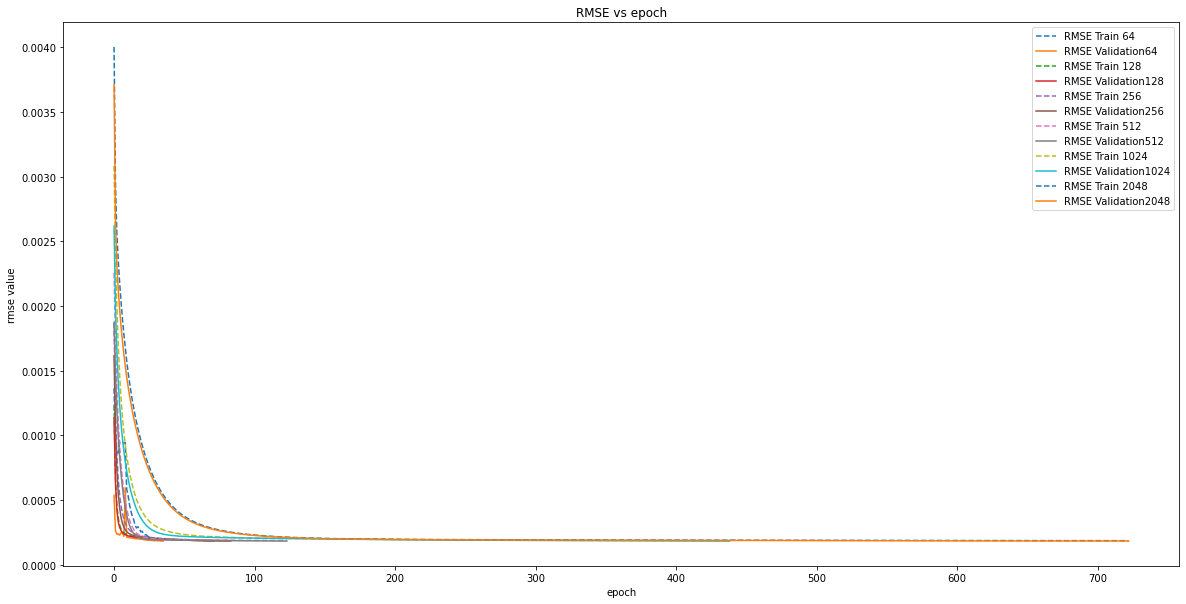

In [43]:
w_l=[]
rmse_t=[]
rmse_v=[]
elapse_t=[]
plt.figure(figsize=(20,10))
plt.title('RMSE vs epoch')
for batch in [64,128, 256, 512, 1024, 2048]:
    w, rmse_train, rmse_val, elapse_time = mini_batch(Xs_train_1f, y_train, Xs_val_1f, y_val, batch, 0.01, ct)
    epoch_array = list(range(0, len(elapse_time)))
    plt.plot(epoch_array, rmse_train, label='RMSE Train '+str(batch),linestyle = 'dashed')
    plt.plot(epoch_array, rmse_val, label='RMSE Validation'+str(batch))
    
    w_l.append(w)
    rmse_t.append(rmse_train)
    rmse_v.append(rmse_val)
    elapse_t.append(elapse_time)
    
plt.xlabel('epoch')
plt.ylabel('rmse value')
plt.legend()
plt.show()

### 2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**

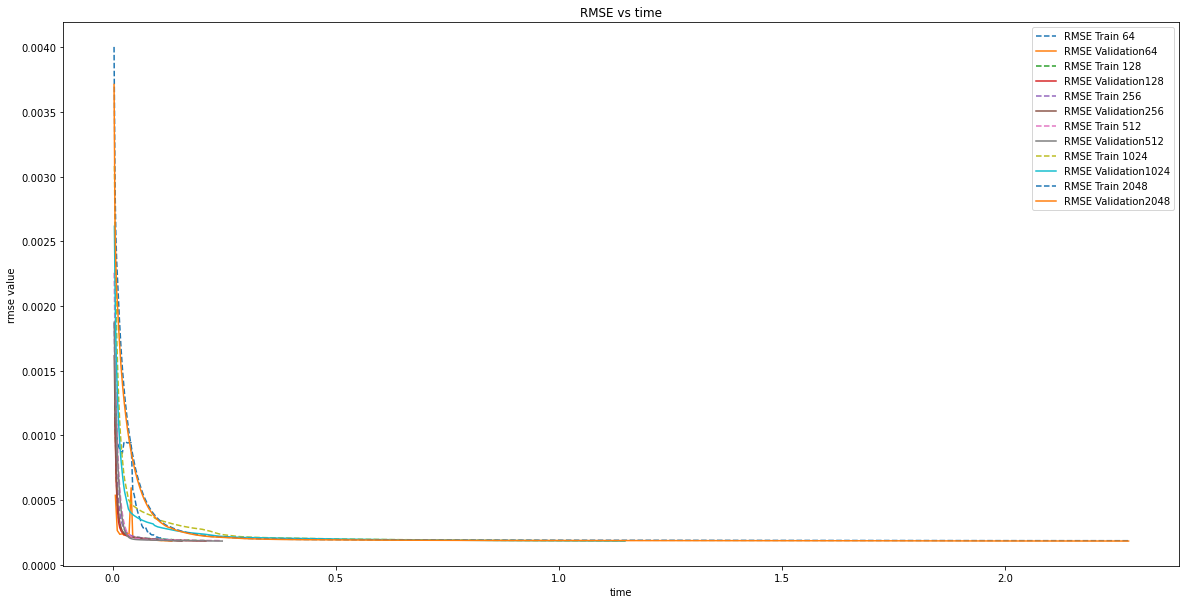

In [44]:
i=0
plt.figure(figsize=(20,10))
plt.title('RMSE vs time')
for batch in [64,128, 256, 512, 1024, 2048]:
    plt.plot(elapse_t[i], rmse_t[i], label='RMSE Train '+str(batch),linestyle = 'dashed')
    plt.plot(elapse_t[i], rmse_v[i], label='RMSE Validation'+str(batch))
    i+=1
plt.xlabel('time')
plt.ylabel('rmse value')
plt.legend()
plt.show()

### 3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

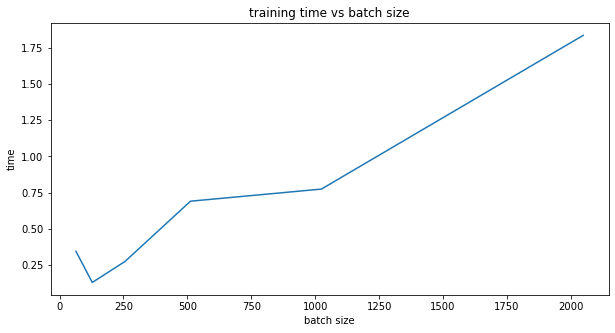

In [40]:
i=0
plt.figure(figsize=(10,5))
plt.title('training time vs batch size')
t=[]
for batch in [64,128, 256, 512, 1024, 2048]:
    t.append(elapse_t[i][-1])
    i+=1
plt.plot([64,128, 256, 512, 1024, 2048],t)
plt.xlabel('batch size')
plt.ylabel('time')
# plt.legend()
plt.show()

### Describe your findings, including the main takeaways from each of your plots.

From the first plot, we can see that RMSE drops quickly in the first 100 epoch, after that, the decrease of RMSE is very slow. Gradient Descent with batch size of 64-1024 converges within 200 epoch, batch size of 2048 converges in 800 epoch. It seems that gradient descent with smaller batch size converges in less epoch.

From the second plot, we can see that for many of the batch sizes, (64-1024), our gradient descent converges with in 0.5 second, batch size of 2048 converge in 2.5 seconds. Compared with last part, full-batched gradient descent takes about 2.9 seconds. It indicates that mini-batch gradient descent converges faster than full-batch, convergence time seems to be shorter if we have a smaller batch size(but not smaller than 64 in this case).

From the third plot, the batch size increase from 64 to 2048, while the running time first drop at 128, then increase continuously, so we can say that a batch size of around 128 minimizes convergence time of mini-batch gradient descent for this particular dataset.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [48]:
for batch in [8, 16, 32]:
    for llr in [0.0005,0.0008,0.001,0.0025,0.005,0.01,0.02,0.03]:
        print('batch size:',batch,'learning rate:',llr)
        w, rmse_train, rmse_val, elapse_time = mini_batch(Xs_train_1f, y_train, Xs_val_1f, y_val, batch, llr, ct)
        


batch size: 8 learning rate: 0.0005
batch size: 8 learning rate: 0.0008
batch size: 8 learning rate: 0.001
batch size: 8 learning rate: 0.0025
GD not converge!
batch size: 8 learning rate: 0.005
GD not converge!
batch size: 8 learning rate: 0.01
GD not converge!
batch size: 8 learning rate: 0.02
GD not converge!
batch size: 8 learning rate: 0.03
GD not converge!
batch size: 16 learning rate: 0.0005
batch size: 16 learning rate: 0.0008
batch size: 16 learning rate: 0.001
batch size: 16 learning rate: 0.0025
GD not converge!
batch size: 16 learning rate: 0.005
GD not converge!
batch size: 16 learning rate: 0.01
GD not converge!
batch size: 16 learning rate: 0.02
GD not converge!
batch size: 16 learning rate: 0.03
GD not converge!
batch size: 32 learning rate: 0.0005
batch size: 32 learning rate: 0.0008
batch size: 32 learning rate: 0.001
batch size: 32 learning rate: 0.0025
batch size: 32 learning rate: 0.005
batch size: 32 learning rate: 0.01
GD not converge!
batch size: 32 learning rat

From the above, we can see that RMSE converges at learning rate of 0.0005,0.0008,0.001 among batch size of 8, 16, 32. 

In [49]:
rmse5_t=[]
rmse5_v=[]

for batch in [8, 16, 32]:
    for llr in [0.0005,0.0008,0.001]:
        print('batch size:',batch,'learning rate:',llr)
        w, rmse_train, rmse_val, elapse_time = mini_batch(Xs_train_1f, y_train, Xs_val_1f, y_val, batch, llr, ct)
        rmse5_t.append(round(rmse_train[-1],6))
        rmse5_v.append(round(rmse_val[-1],6))
print(rmse5_t)    
print(rmse5_v)

batch size: 8 learning rate: 0.0005
batch size: 8 learning rate: 0.0008
batch size: 8 learning rate: 0.001
batch size: 16 learning rate: 0.0005
batch size: 16 learning rate: 0.0008
batch size: 16 learning rate: 0.001
batch size: 32 learning rate: 0.0005
batch size: 32 learning rate: 0.0008
batch size: 32 learning rate: 0.001
[0.000184, 0.000186, 0.000188, 0.000184, 0.000184, 0.000185, 0.000185, 0.000183, 0.000189]
[0.000182, 0.000182, 0.000182, 0.000182, 0.000182, 0.000182, 0.000182, 0.000182, 0.000182]


| Batch size | learing rate |    RMSE Training   |  RMSE Validation | 
| ---------- | ------------ | ------------------ | ---------- | 
|   128      |    0.0005    | 0.000184   |    0.000182    |   
|   128      |    0.0008    | 0.000186   |    0.000182    |   
|   128      |    0.001     | 0.000188   |    0.000182    |    
|   256      |    0.0005    | 0.000184   |    0.000182    |   
|   128      |    0.0008    | 0.000184   |    0.000182    |   
|   128      |    0.001     | 0.000185   |    0.000182    |
|   512      |    0.0005    | 0.000185   |    0.000182    |   
|   128      |    0.0008    | 0.000183   |    0.000182    |   
|   128      |    0.001     | 0.000189   |    0.000182    |

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**

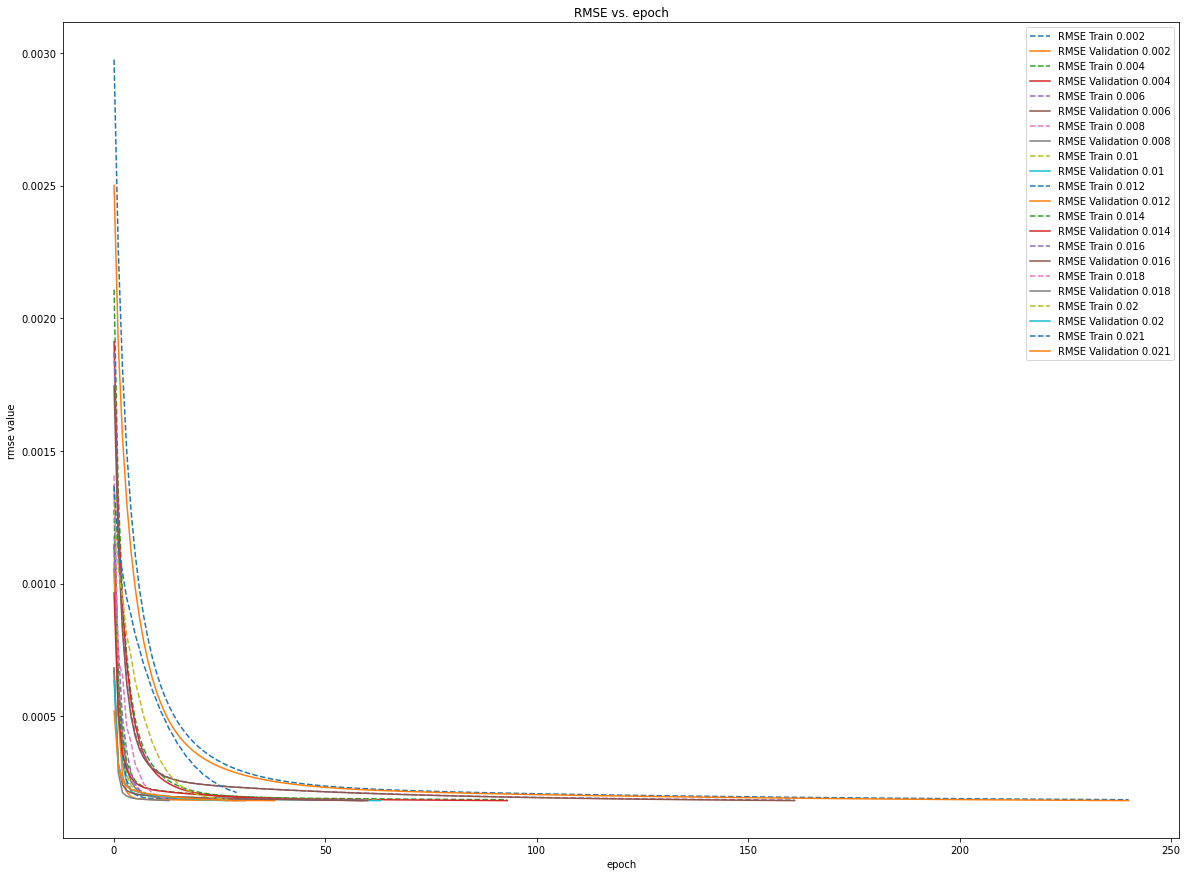

In [314]:
rmse5_t=[]
rmse5_v=[]
ep_l = []
t_l=[]
plt.figure(figsize=(20,15))
plt.title('RMSE vs. epoch')

for llr in [0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.021]:
    w, rmse_train, rmse_val, elapse_time = mini_batch(Xs_train_1f, y_train, Xs_val_1f, y_val, 128, llr, ct)
    rmse5_t.append(rmse_train)
    rmse5_v.append(rmse_val)
    ep_l.append(len(elapse_time))
    t_l.append(elapse_time)
    epoch_array = list(range(0, len(elapse_time)))
    plt.plot(epoch_array, rmse_train, label='RMSE Train '+str(llr),linestyle = 'dashed')
    plt.plot(epoch_array, rmse_val, label='RMSE Validation '+str(llr))

plt.xlabel('epoch')
plt.ylabel('rmse value')
plt.legend()
plt.show()
    

* Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**

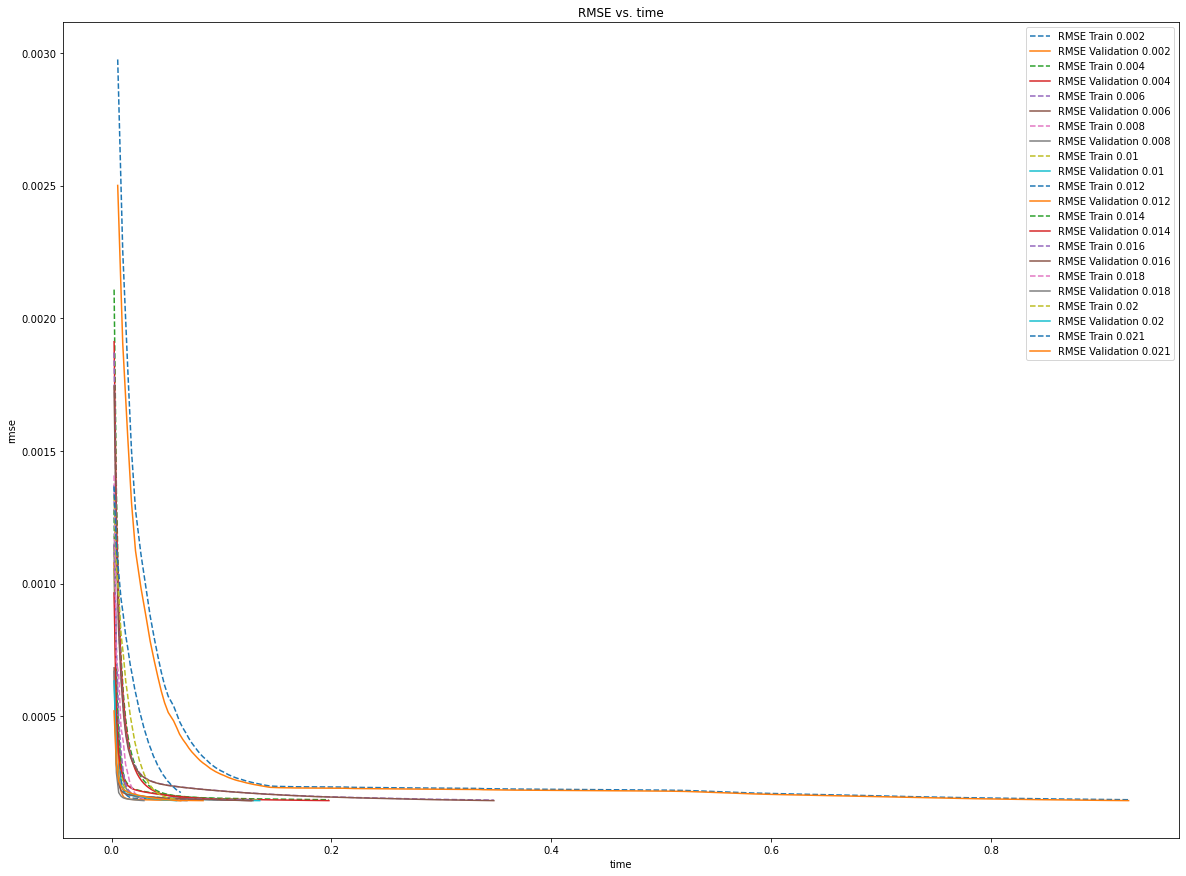

In [319]:
plt.figure(figsize=(20,15))
plt.title('RMSE vs. time')
llr = [0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.021]
for i in range(11):
    plt.plot(t_l[i], rmse5_t[i], label='RMSE Train '+str(llr[i]),linestyle = 'dashed')
    plt.plot(t_l[i], rmse5_v[i], label='RMSE Validation '+str(llr[i]))
    
plt.xlabel('time')
plt.ylabel('rmse')
plt.legend()
plt.show()

* Describe your findings, including the main takeaways from each of your plots. **[0.5]**

From the plot of RMSE vs. epoch, we can find that RMSE drops quickly in the first 50 epoch for batch size of 128, after that, the decrease of RMSE is very slow. Gradient Descent with batch size of 128 and learning rate of 0.002 converges most slowly in 250 epoch. It seems that gradient descent with smaller learning rate converges in more epoch, because we are only making a small difference in w in each epoch. On the other hand, a large learning rate leads to divergence since we are making a large step in each epoch.

From the plot of RMSE vs. time, we can observe that for most of the learning rate, RMSE converges within 0.2 seconds. Learning rate of 0.002 take the longest time to converge, this is consistent with our findings from last plot, since lr=0.002 is too small, it leads to a very large epoch, therefore a large running time.

In [348]:
ep_l

[241, 94, 162, 32, 64, 39, 60, 61, 14, 28, 30]

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

**Here I choose mini-batch gradient descent with batch size 128, learning rate 0.018, since it takes slowest running time and small number of epoch.**

In [357]:
w, rmse_train, rmse_val, elapse_time = mini_batch(Xs_train_1f, y_train, Xs_test_1f, y_test, 128, 0.018, ct)
print('Test model performance')
print('Time for convergence:',elapse_time[-1])
print('Number of epoch:',len(rmse_train))
print('RMSE of training set:',rmse_train[-1])
print('RMSE of test set:',rmse_val[-1])

Test model performance
Time for convergence: 0.09613704681396484
Number of epoch: 21
RMSE of training set: 0.00018882189273434894
RMSE of test set: 0.00018123503524070965


In [ ]:
### YOUR CODE HERE ###

## Part 7 - Getting started with GitHub  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ZC8Petsq to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/f22-project4-git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/f22-project4-git-*********
```
If this is the first time you are using Git Bash, it will ask you to sign in on GitHub via your browser. 

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\f22-project4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add F22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link : <font color='red'>** **--FILL HERE---**</font>

https://github.com/APS-1070-2021/f22-project4-git-TongfeiLi66.git